# TD1: Lotka-Volterra's prey-predator enzymatic model
- reaction network
- differential, stochastic and boolean semantics
- addition of immigration/emigration reactions

F. Fages, 18 Jan. 2019

In [1]:
clear_model.

In [2]:
present(A,a). present(B,b).

In [3]:
k1*A*B for A+B => 2*B.

In [4]:
k2*A for A => 2*A.

In [5]:
k3*B for B => _.

In [6]:
parameter(a=1, b=1, k1=2, k2=2, k3=1).

In [7]:
list_model.

k1*A*B for A=[B]=>B.
k2*A for _=[A]=>A.
k3*B for B=>_.
present(A,a).
present(B,b).
parameter(
  a = 1,
  b = 1,
  k1 = 2,
  k2 = 2,
  k3 = 1
).


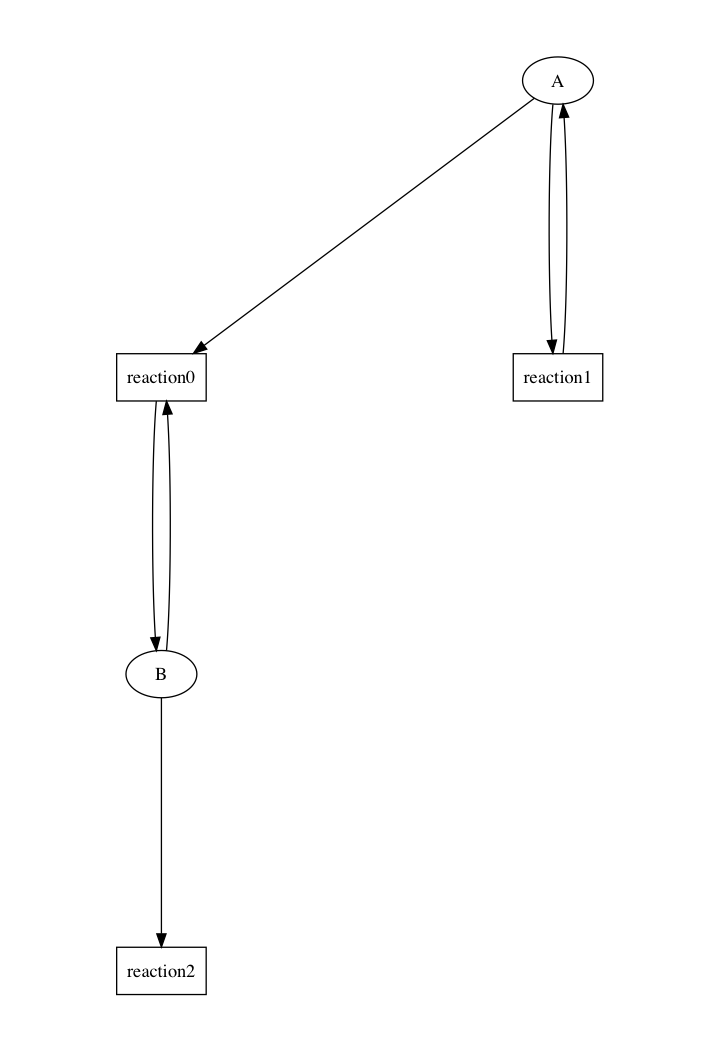

In [8]:
draw_reactions.

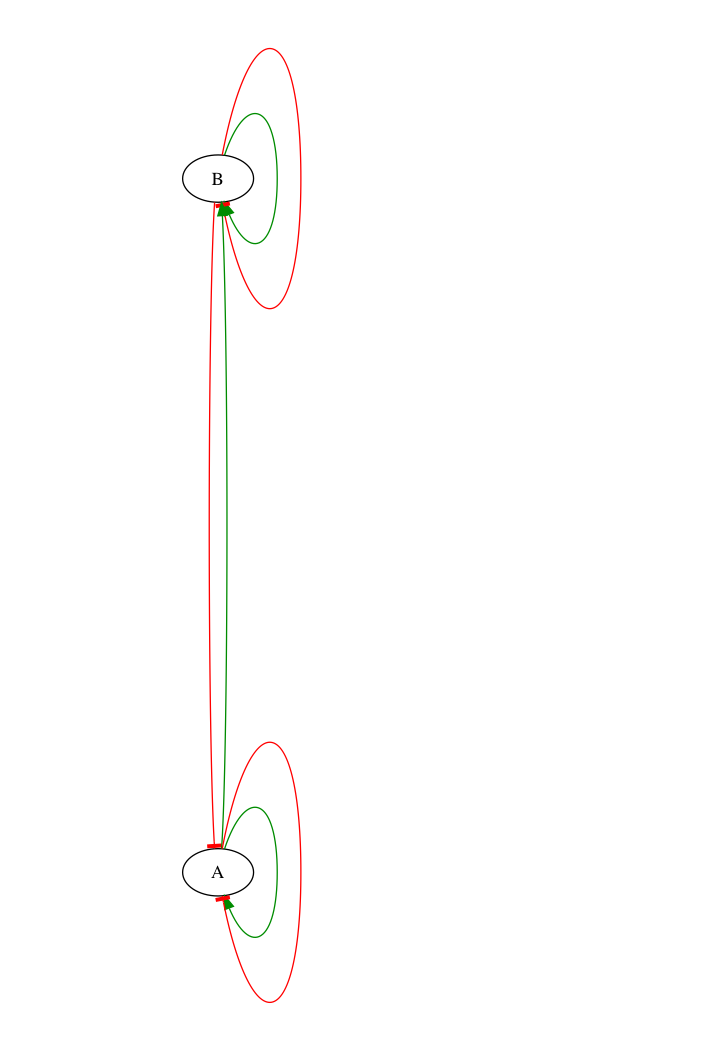

In [9]:
draw_influences.

## Continuous semantics
* One observes sustained oscillations and limit cycle

In [10]:
list_ode.

In [11]:
search_conservations.

No complex invariant found


In [12]:
option(time:40).

In [13]:
numerical_simulation. plot.

In [14]:
plot(show:B, against:A).

## Stochastic semantics
* With this parameter set, the prey and predator extend almost surely
* The intuitive explanation is that low concentrations become almost surely 0 at some time point in the stochastic simulation.

In [15]:
seed(0). numerical_simulation(method:ssa). plot.

In [16]:
plot(show:B, against:A).

## Boolean semantics
* reason just on the presence or absence of molecular species
* asynchronous Boolean transition system ignoring reaction rates
* SAT algorithm for enumerating all stable states, here: 
 * either both A, B absent is a stable state
 * or B absent A present
 * yet both A and B present is not stable since A and B may disappear in this case

In [17]:
list_stable_states.

[A-0,B-0]
[A-1,B-0]


* Computation Tree Logic (CTL) symbolic model-checking algorithm for enumerating possible qualitative behaviors of interest, here:
 * both A and B may extinguish
 * species A may survive with no possibility of disappearing (reachability of stable state A present)
 * B may survive but with always the possibility of disappearing (reachability of non stable steady state B present)
 * no Boolean oscillation possible (0 is stable)
 * checkpoints are possibly non causal phenomenological properties

In [18]:
generate_ctl_not.

reachable(stable('A'))
reachable(stable(not'A'))
reachable(stable(not'B'))
reachable(steady('B'))
checkpoint2('B',not'A')
checkpoint2('A',not'B')


In [19]:
expand_ctl(stable(f)).

AG(f)


In [20]:
expand_ctl(steady(f)).

EG(f)


In [21]:
expand_ctl(reachable(steady(s))).

EF(EG(s))


In [22]:
expand_ctl(checkpoint(x,y)).

not EU(not x,y)


In [23]:
expand_ctl(checkpoint2(x,y)).

EF(y)/\not EU(not x,y)


In [24]:
check_ctl(query: reachable(checkpoint2(not A, not B))).

reachable(checkpoint2(not A,not B)) is true


In [25]:
check_ctl(query: reachable(checkpoint2(not B, not A))).

reachable(checkpoint2(not B,not A)) is false


# Questions on the continuous semantics


### 1) play with the sliders below to change the parameter values 

In [26]:
%slider k1 k2 k3 a b

Box(children=(SelectionSlider(continuous_update=False, description='k1', index=10, layout=Layout(min_width='300px'), options=(('0', 0.0), ('0.2', 0.2), ('0.4', 0.4), ('0.6', 0.6000000000000001), ('0.8', 0.8), ('1', 1.0), ('1.2', 1.2000000000000002), ('1.4', 1.4000000000000001), ('1.6', 1.6), ('1.8', 1.8), ('2', 2.0), ('2.2', 2.2), ('2.4', 2.4000000000000004), ('2.6', 2.6), ('2.8', 2.8000000000000003), ('3', 3.0), ('3.2', 3.2), ('3.4', 3.4000000000000004), ('3.6', 3.6), ('3.8', 3.8000000000000003), ('4', 4.0), ('4.2', 4.2), ('4.4', 4.4), ('4.6', 4.6000000000000005), ('4.8', 4.800000000000001), ('5', 5.0), ('5.2', 5.2), ('5.4', 5.4), ('5.6', 5.6000000000000005), ('5.8', 5.800000000000001), ('6', 6.0), ('6.2', 6.2), ('6.4', 6.4), ('6.6', 6.6000000000000005), ('6.8', 6.800000000000001), ('7', 7.0), ('7.2', 7.2), ('7.4', 7.4), ('7.6', 7.6000000000000005), ('7.8', 7.800000000000001), ('8', 8.0), ('8.2', 8.200000000000001), ('8.4', 8.4), ('8.6', 8.6), ('8.8', 8.8), ('9', 9.0), ('9.2', 9.200000000000001), ('9.4', 9.4), ('9.6', 9.600000000000001), ('9.8', 9.8), ('10', 10.0), ('10.2', 10.200000000000001), ('10.4', 10.4), ('10.6', 10.600000000000001), ('10.8', 10.8), ('11', 11.0), ('11.2', 11.200000000000001), ('11.4', 11.4), ('11.6', 11.600000000000001), ('11.8', 11.8), ('12', 12.0), ('12.2', 12.200000000000001), ('12.4', 12.4), ('12.6', 12.600000000000001), ('12.8', 12.8), ('13', 13.0), ('13.2', 13.200000000000001), ('13.4', 13.4), ('13.6', 13.600000000000001), ('13.8', 13.8), ('14', 14.0), ('14.2', 14.200000000000001), ('14.4', 14.4), ('14.6', 14.600000000000001), ('14.8', 14.8), ('15', 15.0), ('15.2', 15.200000000000001), ('15.4', 15.4), ('15.6', 15.600000000000001), ('15.8', 15.8), ('16', 16.0), ('16.2', 16.2), ('16.4', 16.400000000000002), ('16.6', 16.6), ('16.8', 16.8), ('17', 17.0), ('17.2', 17.2), ('17.4', 17.400000000000002), ('17.6', 17.6), ('17.8', 17.8), ('18', 18.0), ('18.2', 18.2), ('18.4', 18.400000000000002), ('18.6', 18.6), ('18.8', 18.8), ('19', 19.0), ('19.2', 19.200000000000003), ('19.4', 19.400000000000002), ('19.6', 19.6), ('19.8', 19.8), ('20', 20.0)), value=2.0), SelectionSlider(continuous_update=False, description='k2', index=10, layout=Layout(min_width='300px'), options=(('0', 0.0), ('0.2', 0.2), ('0.4', 0.4), ('0.6', 0.6000000000000001), ('0.8', 0.8), ('1', 1.0), ('1.2', 1.2000000000000002), ('1.4', 1.4000000000000001), ('1.6', 1.6), ('1.8', 1.8), ('2', 2.0), ('2.2', 2.2), ('2.4', 2.4000000000000004), ('2.6', 2.6), ('2.8', 2.8000000000000003), ('3', 3.0), ('3.2', 3.2), ('3.4', 3.4000000000000004), ('3.6', 3.6), ('3.8', 3.8000000000000003), ('4', 4.0), ('4.2', 4.2), ('4.4', 4.4), ('4.6', 4.6000000000000005), ('4.8', 4.800000000000001), ('5', 5.0), ('5.2', 5.2), ('5.4', 5.4), ('5.6', 5.6000000000000005), ('5.8', 5.800000000000001), ('6', 6.0), ('6.2', 6.2), ('6.4', 6.4), ('6.6', 6.6000000000000005), ('6.8', 6.800000000000001), ('7', 7.0), ('7.2', 7.2), ('7.4', 7.4), ('7.6', 7.6000000000000005), ('7.8', 7.800000000000001), ('8', 8.0), ('8.2', 8.200000000000001), ('8.4', 8.4), ('8.6', 8.6), ('8.8', 8.8), ('9', 9.0), ('9.2', 9.200000000000001), ('9.4', 9.4), ('9.6', 9.600000000000001), ('9.8', 9.8), ('10', 10.0), ('10.2', 10.200000000000001), ('10.4', 10.4), ('10.6', 10.600000000000001), ('10.8', 10.8), ('11', 11.0), ('11.2', 11.200000000000001), ('11.4', 11.4), ('11.6', 11.600000000000001), ('11.8', 11.8), ('12', 12.0), ('12.2', 12.200000000000001), ('12.4', 12.4), ('12.6', 12.600000000000001), ('12.8', 12.8), ('13', 13.0), ('13.2', 13.200000000000001), ('13.4', 13.4), ('13.6', 13.600000000000001), ('13.8', 13.8), ('14', 14.0), ('14.2', 14.200000000000001), ('14.4', 14.4), ('14.6', 14.600000000000001), ('14.8', 14.8), ('15', 15.0), ('15.2', 15.200000000000001), ('15.4', 15.4), ('15.6', 15.600000000000001), ('15.8', 15.8), ('16', 16.0), ('16.2', 16.2), ('16.4', 16.400000000000002), ('16.6', 16.6), ('16.8', 16.8), ('17', 17.0), ('17.2', 17.2), ('17.4', 17.400000000000002), ('17.6', 17.6), ('17.8', 17.8), ('18', 18.0


### 2) enumerate the possible qualitative behaviors that you could obtain in the continuous semantics

*write your answer here*

...


### 3)  add immigration and emigration reactions for the prey (with parameters k4 k5)

*write your commands in the cells below*



In [ ]:
%slider k4 k5 k1 k2 k3 a b

### 4) enumerate the qualitative behaviors that can now be obtained in the continuous semantics

*write your answer here*


...


### 5) can you make a general conjecture about the existence of sustained oscillations in the stochastic semantics in presence of synthesis and degradation reactions ?

*write your answer here* (to my knowledge there is no known theorem ensuring that property)

 
 
 ...
 